<a href="https://colab.research.google.com/github/junggeyy/DeepLearning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a Perceptron in Python

This notebook demonstrates the implementation of a simple Perceptron model from scratch using Python. It covers loading and visualizing a toy dataset, building the Perceptron class, training the model, evaluating its accuracy, and visualizing the decision boundary.

### Installing libraries

In [ ]:
!pip install numpy pandas matplotlib

### 1. Loading Dataset

In [13]:
import pandas as pd

df = pd.read_csv("perceptron_toydata.txt", sep = "\t", header=None)
df

,0,1,2
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


In [14]:
X_train = df[[0, 1]].values
y_train = df[2].values

### 2. Visualizing the loaded dataset

In [15]:
import matplotlib.pyplot as plt

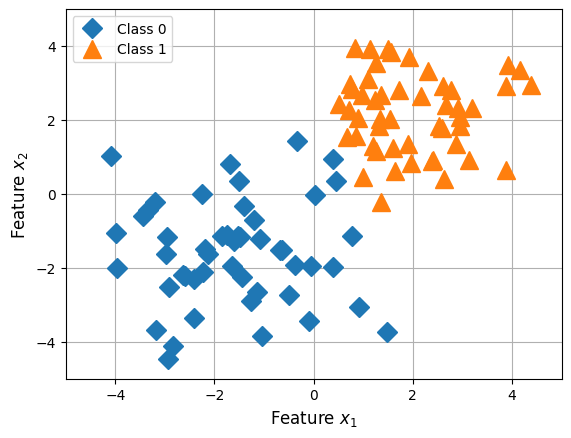

In [16]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle="",
    label="Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

### 3. Implementation

Here, we are creating a Perceptron class. The constructor initializes the perceptron with a given number of input features and we initialize the weight vector and bias term to 0.0 for simplicity.
We also define a forward function which takes in the input features and we calculate the weighted sum as the sum of products of input feature and their corresponding weights.
Finally, we have the update function, which calcuates the error in prediction, based on the true label. Then, it updates the weights and bias in accordance with the error. Simply, if the prediction is greater than the true label- we decrease the weights and bias, else we increase them.

In [17]:
class Perceptron:
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = [0.0 for _ in range(num_features)]
    self.bias = 0.0

  def forward(self, x):
    weighted_sum = self.bias # weighted_sum = z
    for i, _ in enumerate(self.weights):
      weighted_sum += x[i] * self.weights[i]

    prediction = 1 if weighted_sum > 0 else 0
    return prediction

  def update(self, x, true_label):
    prediction = self.forward(x)
    error = true_label - prediction
    for i, _ in enumerate(self.weights):
      self.weights[i] += error * x[i]

    self.bias += error
    return error

Finally, we define a train function which takes our model, all x and y values (input features and true label) and the epochs cycle. It then runs our model with those parameters for the defined number of epochs.

In [20]:
def train(model, all_x, all_y, epochs):
  for epoch in range(epochs):
    error_count = 0
    for x, y in zip(all_x, all_y):
      error = model.update(x, y)
      error_count += abs(error)

    print(f"Epoch: {epoch+1}, errors: {error_count}")

Now, we train the model for our toydata dataset and see that the model doesn't have any errors after the 5th epoch.

In [22]:
perceptron1 = Perceptron(num_features=2)
train(model = perceptron1, all_x = X_train, all_y = y_train, epochs=7)

Epoch: 1, errors: 1
Epoch: 2, errors: 6
Epoch: 3, errors: 2
Epoch: 4, errors: 2
Epoch: 5, errors: 1
Epoch: 6, errors: 0
Epoch: 7, errors: 0


### 5. Evaluating the results

Here, we evaluate the accuracy of our Perceptron model. To achieve this, we compare the model's predictions to the true labels and calculate the percentage of correct predictions.


In [26]:
def compute_accuracy(model, all_x, all_y):
  correct_predictions = 0

  for x, y in zip(all_x, all_y):
    prediction = model.forward(x)
    correct_predictions += int(prediction == y)

  accuracy = correct_predictions / len(all_x)
  return accuracy*100

In [27]:
training_accuracy = compute_accuracy(perceptron1, X_train, y_train)
print(f"Training accuracy: {training_accuracy}%")

Training accuracy: 100.0%


### 6. Visualizing the decision boundary

Here, we plot back our training data points and add the decision boundary learned by the Perceptron.

In [30]:
def plot_decision_boundary(model):
  w1, w2 = model.weights[0], model.weights[1]
  b = model.bias

  x1_min = -20
  x2_min = (-(w1 * x1_min) - b) / w2

  x1_max = 20
  x2_max = (-(w1 * x1_max) - b) / w2

  return x1_max, x1_min, x2_max, x2_min

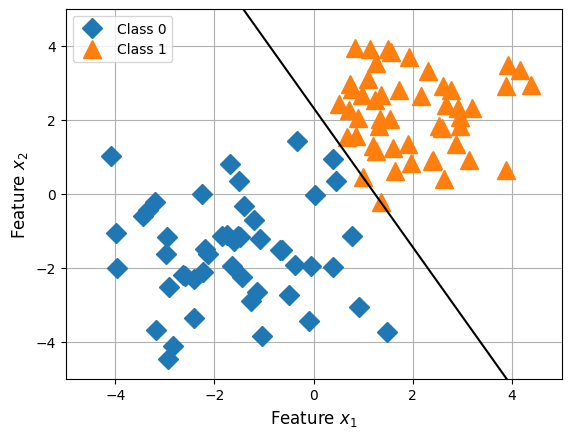

In [31]:
x1_max, x1_min, x2_max, x2_min = plot_decision_boundary(perceptron1)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle="",
    label="Class 1"
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()